In [1]:
import pandas as pd
import os
import tarfile
import gzip


In [2]:
PATH_BA = '../Data/BeerAdvocate_CSV.tar.gz'
PATH_RB = '../Data/RateBeer_CSV.tar.gz'
folder_BA = tarfile.open(PATH_BA)
folder_RB = tarfile.open(PATH_RB)

For RateBeer and BeerAdvocate, we extracted each review and transformed it in a dataframe with all the reviews.

In [3]:
# Extracting the files for BeerAdvocate
df_beers_BA = pd.read_csv(folder_BA.extractfile(folder_BA.getmember('../Data/BeerAdvocate/beers.csv')))
df_users_BA = pd.read_csv(folder_BA.extractfile(folder_BA.getmember('../Data/BeerAdvocate/users.csv')))
df_reviews_BA = pd.read_csv(folder_BA.extractfile(folder_BA.getmember('../Data/BeerAdvocate/reviews.csv')))
df_breweries_BA = pd.read_csv(folder_BA.extractfile(folder_BA.getmember('../Data/BeerAdvocate/breweries.csv')))

# Extracting the files for RateBeer
df_beers_RB = pd.read_csv(folder_RB.extractfile(folder_RB.getmember('../Data/RateBeer/beers.csv')))
df_users_RB = pd.read_csv(folder_RB.extractfile(folder_RB.getmember('../Data/RateBeer/users.csv')))
df_reviews_RB = pd.read_csv(folder_RB.extractfile(folder_RB.getmember('../Data/RateBeer/reviews.csv')))
df_breweries_RB = pd.read_csv(folder_RB.extractfile(folder_RB.getmember('../Data/RateBeer/breweries.csv')))

In [4]:
#For RateBeer review, we added 2 columns in the dataframe with the nationality of the user and the location of the brewery. 
user_nat_RB=pd.DataFrame()
user_nat_RB['user_name']=df_users_RB['user_name']
user_nat_RB['location_user']=df_users_RB['location']
new_reviews_RB=pd.merge(df_reviews_RB, user_nat_RB,  how='inner', on='user_name')

beers_nat_RB=pd.DataFrame()
beers_nat_RB['beer_id']=df_breweries_RB['id']
beers_nat_RB['beers_location']=df_breweries_RB['location']
new_reviews_RB['beer_id']=new_reviews_RB['beer_id'].apply(lambda x: int(x))
df_RB= pd.merge(new_reviews_RB, beers_nat_RB, how='inner', on='beer_id')
#df_RB=df_RB.dropna(subset=['appearance', 'aroma','palate', 'taste', 'overall', 'rating', 'location_user', 'beers_location'])

In [5]:
#For  BeerAdvocate review, we added 2 columns in the dataframe with the nationality of the user and the location of the brewery. 
user_nat_BA=pd.DataFrame()
user_nat_BA['user_name']=df_users_BA['user_name']
user_nat_BA['location_user']=df_users_BA['location']
new_reviews_BA=pd.merge(df_reviews_BA, user_nat_BA,  how='inner', on='user_name')

beers_nat_BA=pd.DataFrame()
beers_nat_BA['beer_id']=df_breweries_BA['id']
beers_nat_BA['beers_location']=df_breweries_BA['location']
new_reviews_BA['beer_id']=new_reviews_BA['beer_id'].apply(lambda x: int(x))
df_BA = pd.merge(new_reviews_BA, beers_nat_BA, how='inner', on='beer_id')
#df_BA=df_BA.dropna(subset=['appearance', 'aroma','palate', 'taste', 'overall', 'rating', 'location_user', 'beers_location'])

In [7]:
#Here we extracted from wikipedia a tab the list Us states abreviations.
US_states = pd.read_html('https://en.wikipedia.org/wiki/ISO_3166-2:US')[0] 
US_states['Subdivision name (en)'] = US_states['Subdivision name (en)'].apply(lambda x: 'United States, ' + x) 
US_states['Code'] = US_states['Code'].apply(lambda x: x[3:]) 
US_states.drop(columns=['Subdivision category'], inplace=True) 
 
#For BA and RB we added 2 columns with the state of the user and the state of the brewery if they are from the US.
US_states_user=US_states.rename(columns={'Subdivision name (en)':'location_user', 'Code':'US_Code_User'}) 
US_states_beer=US_states.rename(columns={'Subdivision name (en)':'beers_location', 'Code':'US_Code_Beer'}) 
US_states_beer 
df_BA=pd.merge(US_states_beer, df_BA, how='outer', on='beers_location') 
df_BA=pd.merge(US_states_user, df_BA, how='outer', on='location_user') 

df_RB=pd.merge(US_states_beer, df_RB, how='outer', on='beers_location')
df_RB=pd.merge(US_states_user, df_RB, how='outer', on='location_user')
 
def keep_United_States_if_in_the_string(x): 
    if 'United States' in x: 
        return 'United States' 
    else: 
        return x 
 
# for the location and nationalities we kept only 'United States' and removed the State name after the comma for ploting.

df_BA['beers_location']=df_BA['beers_location'].apply(lambda x: str(x)) 
df_BA['beers_location']=df_BA['beers_location'].apply(lambda x: keep_United_States_if_in_the_string(x)) 
df_BA['location_user']=df_BA['location_user'].apply(lambda x: str(x)) 
df_BA['location_user']=df_BA['location_user'].apply(lambda x: keep_United_States_if_in_the_string(x)) 

df_RB['beers_location']=df_RB['beers_location'].apply(lambda x: str(x))
df_RB['beers_location']=df_RB['beers_location'].apply(lambda x: keep_United_States_if_in_the_string(x))
df_RB['location_user']=df_RB['location_user'].apply(lambda x: str(x))
df_RB['location_user']=df_RB['location_user'].apply(lambda x: keep_United_States_if_in_the_string(x))

df_RB

,US_Code_User,location_user,US_Code_Beer,beers_location,beer_name,beer_id,brewery_name,brewery_id,style,abv,date,user_name,user_id,appearance,aroma,palate,taste,overall,rating,text
0,AL,United States,AL,United States,Tiger Beer,3126.0,Singapore Brewery (Asia Pacific Breweries-Hein...,547.0,Pale Lager,5.0,1.085652e+09,Jeppe,9058.0,2.0,2.0,2.0,3.0,4.0,1.3,Foamy though disappearing white head on a piss...
1,AL,United States,AL,United States,Tiger Beer,3126.0,Singapore Brewery (Asia Pacific Breweries-Hein...,547.0,Pale Lager,5.0,1.216030e+09,tangentrider,54911.0,3.0,2.0,4.0,6.0,10.0,2.5,Pale beer with a one inch disappearing head. ...
2,AL,United States,AL,United States,Tiger Beer,3126.0,Singapore Brewery (Asia Pacific Breweries-Hein...,547.0,Pale Lager,5.0,1.211623e+09,posikyle,52600.0,3.0,2.0,3.0,7.0,12.0,2.7,"Typical pale lager, but one of the best out th..."
3,AL,United States,AL,United States,Tiger Beer,3126.0,Singapore Brewery (Asia Pacific Breweries-Hein...,547.0,Pale Lager,5.0,1.175594e+09,Rictus,43333.0,3.0,4.0,2.0,6.0,12.0,2.7,The aroma is alittle too light for my taste. U...
4,AL,United States,AL,United States,Tiger Beer,3126.0,Singapore Brewery (Asia Pacific Breweries-Hein...,547.0,Pale Lager,5.0,1.160042e+09,JonnyC22,42655.0,2.0,3.0,3.0,5.0,10.0,2.3,Bottle (6âer) bought at halftime of Fla. St....
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1661198,NaN,Nicaragua,NaN,Switzerland,Cerveza Premium (Nicaragua),26300.0,Compañía Cevercera de Nicaragua,3912.0,Pale Lager,4.0,1.218103e+09,Zavalas1,79805.0,5.0,10.0,5.0,10.0,20.0,5.0,"I have Tried beers from all over the world, an..."
1661199,NaN,Sint Maarten,NaN,France,Belzebuth 13°,4489.0,Grain dOrge (Brasseurs De Gayant),759.0,Belgian Strong Ale,13.0,1.427195e+09,JBaggett2013,362979.0,5.0,6.0,5.0,7.0,20.0,4.3,"caramel, roasty, resin, leather, alcohol, wood..."
1661200,NaN,Haiti,NaN,Japan,Oakham Helter Skelter,6309.0,Oakham,1100.0,Premium Bitter/ESB,5.0,1.252231e+09,skipoffwork,95191.0,5.0,10.0,5.0,10.0,20.0,5.0,This is the best beer Iâve tasted in a long ...
1661201,NaN,Tibet,NaN,Lithuania,Westvleteren 12 (XII),4934.0,Westvleteren Abdij St. Sixtus,623.0,Abt/Quadrupel,10.2,1.359889e+09,oooriii,228391.0,5.0,10.0,5.0,10.0,20.0,5.0,"Perfect, complete and complex. Grape, fig and ..."


Describing data Rendu 3

In [8]:
df_RB.describe()

,beer_id,brewery_id,abv,date,user_id,appearance,aroma,palate,taste,overall,rating
count,1.661189e+06,1.661189e+06,1.629168e+06,1.661189e+06,1.661189e+06,1.661189e+06,1.661189e+06,1.661189e+06,1.661189e+06,1.661189e+06,1.661189e+06
mean,8.914907e+03,1.352321e+03,6.108667e+00,1.246093e+09,7.751208e+04,3.381471e+00,6.071589e+00,3.185382e+00,6.225879e+00,1.266904e+01,3.153338e+00
std,8.907137e+03,2.899499e+03,1.925222e+00,1.285409e+08,9.533349e+04,8.610607e-01,1.766814e+00,8.736617e-01,1.742097e+00,3.623481e+00,7.978916e-01
min,1.000000e+00,1.000000e+00,1.000000e-02,9.555336e+08,2.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,5.000000e-01
25%,1.325000e+03,1.430000e+02,4.900000e+00,1.142852e+09,1.018500e+04,3.000000e+00,5.000000e+00,3.000000e+00,5.000000e+00,1.100000e+01,2.700000e+00
50%,5.719000e+03,5.350000e+02,5.500000e+00,1.235473e+09,3.905700e+04,3.000000e+00,6.000000e+00,3.000000e+00,6.000000e+00,1.300000e+01,3.300000e+00
75%,1.383800e+04,1.390000e+03,7.000000e+00,1.354014e+09,1.010440e+05,4.000000e+00,7.000000e+00,4.000000e+00,7.000000e+00,1.500000e+01,3.700000e+00
max,3.224600e+04,3.187200e+04,2.900000e+01,1.501495e+09,4.899080e+05,5.000000e+00,1.000000e+01,5.000000e+00,1.000000e+01,2.000000e+01,5.000000e+00


In [9]:
#count the nan value in the dataframe
#finalement ya pas tant que ca je pense c'est exploitable on peu faire la prediction
df_RB.isna().sum()

US_Code_User       791225
location_user           0
US_Code_Beer      1176349
beers_location          0
beer_name              14
beer_id                14
brewery_name           14
brewery_id             14
style                  14
abv                 32035
date                   14
user_name              14
user_id                14
appearance             14
aroma                  14
palate                 14
taste                  14
overall                14
rating                 14
text                  217
dtype: int64

In [10]:
#count the Us code users/ en gros le nombre de reviews par etat sur la nationalite de la personne qui a écrit la review
df_RB['US_Code_User'].value_counts()

#certains état ya trop peu de valeur pour être représentatif
#find rows with less than 1000 reviews¨
df_RB['US_Code_User'].value_counts()[df_RB['US_Code_User'].value_counts()<1000]

#je pense qu'on pourra enlever ces states car c'est des iles mais faudrait faire un comparatif par rapport à la population


HI    831
SD    787
WY    736
DC      1
AS      1
GU      1
MP      1
PR      1
UM      1
VI      1
Name: US_Code_User, dtype: int64

In [11]:
#count the Us code beer/ en gros le nombre de reviews par etat sur la nationalite de la biere

df_RB['US_Code_Beer'].value_counts()

#find rows with less than 1000 reviews¨
df_RB['US_Code_Beer'].value_counts()[df_RB['US_Code_Beer'].value_counts()<1000]


SD    899
WV    878
ND    459
RI    337
DC      1
AS      1
GU      1
MP      1
PR      1
UM      1
VI      1
Name: US_Code_Beer, dtype: int64

In [12]:
#nombre de biere par state
df_RB
#Nombre de biere differentes produites par chauques etats
df_RB_beer_per_state=df_RB.drop_duplicates(subset=['beer_id'])
df_RB_beer_per_state.value_counts('US_Code_Beer')

US_Code_Beer
CA    685
CO    306
WA    306
NY    274
MI    244
PA    230
OR    198
TX    190
NC    186
FL    181
IL    178
WI    177
OH    176
VA    154
MN    146
IN    126
MA    114
MO     93
AZ     82
NJ     80
ME     76
MD     74
GA     70
IA     70
MT     67
VT     66
TN     63
CT     54
NM     53
ID     49
NH     49
SC     45
NV     44
KY     42
AL     36
NE     34
AK     28
KS     28
LA     26
WY     25
OK     24
AR     23
UT     21
SD     19
WV     19
HI     18
DE     17
RI     15
ND     13
MS     13
dtype: int64

In [13]:
#nombre de reviews par biere:
#a comparer avec le data de bieres

#on transforme en dataframe, sinon le merge marche pas
df_RB_reviews_per_beer=pd.DataFrame(df_RB['beer_id'].value_counts())
#reset des index pour le merge
df_RB_reviews_per_beer=df_RB_reviews_per_beer.reset_index().rename(columns={'beer_id':'nb_reviews', 'index':'beer_id'})
df_RB_reviews_per_beer=pd.merge(df_RB, df_RB_reviews_per_beer, how='inner', on='beer_id').drop_duplicates(subset=['beer_id'])
#on drop les colonnes inutiles

df_RB_reviews_per_beer.drop(columns=['US_Code_User', 'location_user', 'style', 'abv',
       'date', 'user_name', 'user_id', 'appearance', 'aroma', 'palate',
       'taste', 'overall', 'rating', 'text'])




,US_Code_Beer,beers_location,beer_name,beer_id,brewery_name,brewery_id,nb_reviews
0,AL,United States,Tiger Beer,3126.0,Singapore Brewery (Asia Pacific Breweries-Hein...,547.0,1555
1555,AL,United States,Taj Mahal,4575.0,United Breweries Group,44.0,514
2069,AL,United States,Ulan Bator Baadog,24935.0,Ulan Bator Breweries,10819.0,79
2148,AL,United States,Red Brick Winter Brew (2003 and Earlier),59.0,Red Brick Brewing Company,14.0,22
2170,AL,United States,Königsberg Premium,26641.0,Kompaniya PIT (Heineken),2164.0,18
...,...,...,...,...,...,...,...
1661184,NaN,Norway,Volga Khmelnoe,25327.0,Baltika-Yaroslavl (Baltika - Baltic Beverages ...,3636.0,1
1661185,NaN,Norway,Volga Yachmennoe,25328.0,Baltika-Yaroslavl (Baltika - Baltic Beverages ...,3636.0,1
1661186,NaN,Ukraine,Badaevskoe Beer,26120.0,Badaevskiy Pivovarenny Zavod,3843.0,1
1661187,NaN,Ukraine,Companion Blondă,26097.0,Beermaster S.A.,3903.0,1


In [14]:
#here we plot the number of reviews per contry depending on the nationality of the user.
count_contry_users_RB=df_RB.groupby(['location_user']).count()['beer_name'].to_frame() 
count_contry_users_RB.rename(columns={'beer_name':'number_of_users'}, inplace=True)
count_contry_users_RB.reset_index(inplace=True) 


import plotly.express as px 
 
fig = px.choropleth(count_contry_users_RB, 
                    locations='location_user',  
                    locationmode='country names',  
                    scope="world", 
                    color='number_of_users',  
                     
                    ) 
fig.show()
# Since the plots don't appear on GitHub we print screenshots for now 

For BA and RB the majority of reviews come from the US(869k). It seems more interesting to focus on this region, it also easier for a political trend analysis.

In [15]:
#For RB we plot the number of reviews per state depending on the nationality of the user.
count_contry_users_RB=df_RB.groupby(['US_Code_User']).count()['beer_name'].to_frame() 
count_contry_users_RB.rename(columns={'beer_name':'number_of_users'}, inplace=True)
count_contry_users_RB.reset_index(inplace=True) 
count_contry_users_RB

fig = px.choropleth(count_contry_users_RB,  
                    locations='US_Code_User', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='number_of_users'
                    ) 
fig.show()



In [16]:
#For BA we plot the number of reviews per state depending on the nationality of the user.
count_contry_users_BA=df_BA.groupby(['US_Code_User']).count()['beer_name'].to_frame() 
count_contry_users_BA.rename(columns={'beer_name':'number_of_users'}, inplace=True)
count_contry_users_BA.reset_index(inplace=True) 
count_contry_users_BA

fig = px.choropleth(count_contry_users_BA,  
                    locations='US_Code_User', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='number_of_users'
                    ) 
fig.show()


For BA and RB, the data is not equally distributed between each state. We have to take into consideration that some states have a larger population and a higher beer consumption than others (we found 2 datasets). Using a scoring system, we will be able to determine if our analysis for a region is representative of its population. This criterion will be important for knowing if we keep or not a state for the analysis:(political trend)<->(beer consumption)?

In [17]:
#merge Rb and BA in a function
def merge_RB_BA(df_RB, df_BA):
    df_RB['source']='RB'
    df_BA['source']='BA'
    df_RB_BA=pd.concat([df_RB, df_BA], axis=0)
    return df_RB_BA

    

In [18]:
#create a function 

Test preferences without taking Politics.

In [19]:
df_RB

,US_Code_User,location_user,US_Code_Beer,beers_location,beer_name,beer_id,brewery_name,brewery_id,style,abv,date,user_name,user_id,appearance,aroma,palate,taste,overall,rating,text
0,AL,United States,AL,United States,Tiger Beer,3126.0,Singapore Brewery (Asia Pacific Breweries-Hein...,547.0,Pale Lager,5.0,1.085652e+09,Jeppe,9058.0,2.0,2.0,2.0,3.0,4.0,1.3,Foamy though disappearing white head on a piss...
1,AL,United States,AL,United States,Tiger Beer,3126.0,Singapore Brewery (Asia Pacific Breweries-Hein...,547.0,Pale Lager,5.0,1.216030e+09,tangentrider,54911.0,3.0,2.0,4.0,6.0,10.0,2.5,Pale beer with a one inch disappearing head. ...
2,AL,United States,AL,United States,Tiger Beer,3126.0,Singapore Brewery (Asia Pacific Breweries-Hein...,547.0,Pale Lager,5.0,1.211623e+09,posikyle,52600.0,3.0,2.0,3.0,7.0,12.0,2.7,"Typical pale lager, but one of the best out th..."
3,AL,United States,AL,United States,Tiger Beer,3126.0,Singapore Brewery (Asia Pacific Breweries-Hein...,547.0,Pale Lager,5.0,1.175594e+09,Rictus,43333.0,3.0,4.0,2.0,6.0,12.0,2.7,The aroma is alittle too light for my taste. U...
4,AL,United States,AL,United States,Tiger Beer,3126.0,Singapore Brewery (Asia Pacific Breweries-Hein...,547.0,Pale Lager,5.0,1.160042e+09,JonnyC22,42655.0,2.0,3.0,3.0,5.0,10.0,2.3,Bottle (6âer) bought at halftime of Fla. St....
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1661198,NaN,Nicaragua,NaN,Switzerland,Cerveza Premium (Nicaragua),26300.0,Compañía Cevercera de Nicaragua,3912.0,Pale Lager,4.0,1.218103e+09,Zavalas1,79805.0,5.0,10.0,5.0,10.0,20.0,5.0,"I have Tried beers from all over the world, an..."
1661199,NaN,Sint Maarten,NaN,France,Belzebuth 13°,4489.0,Grain dOrge (Brasseurs De Gayant),759.0,Belgian Strong Ale,13.0,1.427195e+09,JBaggett2013,362979.0,5.0,6.0,5.0,7.0,20.0,4.3,"caramel, roasty, resin, leather, alcohol, wood..."
1661200,NaN,Haiti,NaN,Japan,Oakham Helter Skelter,6309.0,Oakham,1100.0,Premium Bitter/ESB,5.0,1.252231e+09,skipoffwork,95191.0,5.0,10.0,5.0,10.0,20.0,5.0,This is the best beer Iâve tasted in a long ...
1661201,NaN,Tibet,NaN,Lithuania,Westvleteren 12 (XII),4934.0,Westvleteren Abdij St. Sixtus,623.0,Abt/Quadrupel,10.2,1.359889e+09,oooriii,228391.0,5.0,10.0,5.0,10.0,20.0,5.0,"Perfect, complete and complex. Grape, fig and ..."


C'est à partir de la poulpe.


One of the first questions we want to answer is: Do Americans prefer American beers over foreign ones?

In a first step we will determine if there is an effect in general. We will keep only the reviews written by Americans.
Then we will divide the dataset in 2:
The first dataset is composed of American reviews on american beers and the next one of American reviews on foreign beers.

Our strategy is to compare the 2 datasets and to apply different statistical tests on them.
The H_0 hypothesis of these tests is that both distributions come from the same probability distribution. If the p_value is less than 0.05, then the 2 distributions do not come from the same law and therefore there is an effect: That is to say that the Americans rate better or worse the American beers.

In a second part, we will have to determine where this effect comes from, if it exists. Maybe American beers are just better than foreign beers or maybe there is a patriotic effect on the rating of beers. 
::::we will also try to dig deeper to see if there is an effect related to every beer aspect?::::
::::::thibaut:::::



Translated with www.DeepL.com/Translator (free version)

In [63]:


df_RB_US=df_RB[(df_RB['beers_location']=='United States')  & (df_RB['location_user']=='United States')]
df_RB_Foreign=df_RB[(df_RB['beers_location']!='United States')  & (df_RB['location_user']=='United States')]

print('The number of rows of the US beers dataset is', df_RB_US.shape[0])
print('The number of rows of the Foreign beers dataset is', df_RB_Foreign.shape[0])




The number of rows of the US beers dataset is 265280
The number of rows of the Foreign beers dataset is 604698


First let's take a look at the distributions and see if we can observe an effect. Since the size of the datasets is not the same, we scale each dataset to obtain samples of the same size

In [66]:
import numpy as np
import pandas as pd


def sample_rows(df, size_draw):
    """""
    this function takes a dataframe and return a random sample of the dataframe with the size_draw specified
    """""
    df_sampled=pd.DataFrame()
    indices = np.random.randint(0, len(df), size_draw)
    df_tmp = df.iloc[indices]
    df_sampled=pd.concat([df_sampled, df_tmp], axis=0)
    return df_sampled

df_RB_US_sample=sample_rows(df_RB_US, 10000)
df_RB_Foreign_sample=sample_rows(df_RB_Foreign, 10000)
print(df_RB_US_boot.shape, df_RB_Foreign_boot.shape)

(10000, 20) (10000, 20)


Text(0.5, 1.0, 'Rating')

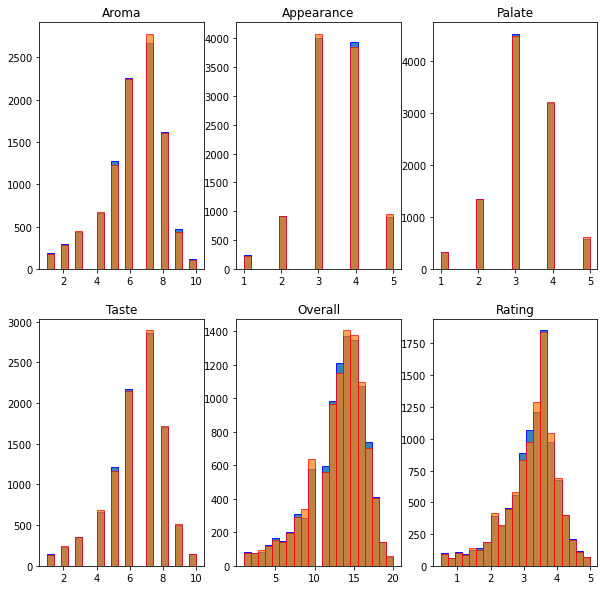

In [25]:

import matplotlib.pyplot as plt
fig, axs = plt.subplots(2, 3, figsize=(10, 10))
axs[0, 0].hist(df_RB_Foreign_sample['aroma'], bins= 21, alpha=0.9, edgecolor='blue', label = "Winner")
axs[0, 0].hist(df_RB_US_sample['aroma'], bins= 21, alpha= 0.7, edgecolor='red', label= "Loser")
axs[0, 0].set_title('Aroma')
axs[0, 1].hist(df_RB_Foreign_sample['appearance'], bins= 21, alpha=0.9, edgecolor='blue', label = "Winner")
axs[0, 1].hist(df_RB_US_sample['appearance'], bins= 21, alpha= 0.7, edgecolor='red', label= "Loser")
axs[0, 1].set_title('Appearance')
axs[0, 2].hist(df_RB_Foreign_sample['palate'], bins= 21, alpha=0.9, edgecolor='blue', label = "Winner")
axs[0, 2].hist(df_RB_US_sample['palate'], bins= 21, alpha= 0.7, edgecolor='red', label= "Loser")
axs[0, 2].set_title('Palate')
axs[1, 0].hist(df_RB_Foreign_sample['taste'], bins= 21, alpha=0.9, edgecolor='blue', label = "Winner")
axs[1, 0].hist(df_RB_US_sample['taste'], bins= 21, alpha= 0.7, edgecolor='red', label= "Loser")
axs[1, 0].set_title('Taste')
axs[1, 1].hist(df_RB_Foreign_sample['overall'], bins= 21, alpha=0.9, edgecolor='blue', label = "Winner")
axs[1, 1].hist(df_RB_US_sample['overall'], bins= 21, alpha= 0.7, edgecolor='red', label= "Loser")
axs[1, 1].set_title('Overall')
axs[1, 2].hist(df_RB_Foreign_sample['rating'], bins= 21, alpha=0.9, edgecolor='blue', label = "Winner")
axs[1, 2].hist(df_RB_US_sample['rating'], bins= 21, alpha= 0.7, edgecolor='red', label= "Loser")
axs[1, 2].set_title('Rating')




Here we plotted the number of reviews per grade for each beer aspect for both datasets: 
- blue: Foreign bee
- red: Us beers

It seems that the distrubtions are identical. However, one or more statistical tests are necessary to be sure. It should also be noted that the distributions are approximately Gaussian, so we can use a t_test

In [74]:
def sample_rows(df, size_draw):
    """""
    this function takes a dataframe and return a random sample of the dataframe with the size_draw specified
    """""
    df_sampled=pd.DataFrame()
    indices = np.random.randint(0, len(df), size_draw)
    df_tmp = df.iloc[indices]
    df_sampled=pd.concat([df_sampled, df_tmp], axis=0)
    return df_sampled


def do_a_test(n_boot, size_draw, df1, df2, type_test ='t_test'):
    test_list_dataframe=[]
    """""
    this function takes two dataframes, the number of bootstrapping and the size of the sample in the orginal dataframes
    It return a list of dataframes with the results of the test choosen for each beer aspect.

    """""

    for i in range (n_boot):
        test_list_dataframe.append(pd.DataFrame(columns=['t_test_stat', 't_test_p', 't_test_diff_mean']))

    for i in range(n_boot):
        df1_boot=sample_rows(df1, size_draw)
        df2_boot=sample_rows(df2, size_draw)
        for columns in ['aroma', 'appearance', 'palate', 'taste', 'overall', 'rating']:
            if type_test=='t_test':
                tmp = stats.ttest_ind(df1_boot[columns],  df2_boot[columns], equal_var=False)
                concat_df=pd.DataFrame({"t_test_stat" : [tmp.statistic] , "t_test_p" : [tmp.pvalue], "t_test_diff_mean" : [df1_boot[columns].mean() - df2_boot[columns].mean()]}, index = [columns])
                test_list_dataframe[i]=pd.concat([test_list_dataframe[i], concat_df], axis=0)
            if type_test=='ks_test':
                tmp = stats.ks_2samp(df1_boot[columns],  df2_boot[columns])
                concat_df=pd.DataFrame({"ks_test_stat" : [tmp.statistic] , "ks_test_p" : [tmp.pvalue]}, index = [columns])
                test_list_dataframe[i]=pd.concat([test_list_dataframe[i], concat_df], axis=0)
            if type_test=='Wicoxon_test':
                tmp = stats.wilcoxon(df1_boot[columns],  df2_boot[columns])
                concat_df=pd.DataFrame({"Wicoxon_test_stat" : [tmp.statistic] , "Wicoxon_test_p" : [tmp.pvalue]}, index = [columns])
                test_list_dataframe[i]=pd.concat([test_list_dataframe[i], concat_df], axis=0)
        if i%1000==0:
            print('number of boot' , i)
    return test_list_dataframe
    

def do_a_mean_test(test_list_dataframe, n_boot, type_test='t_test'):
    """""
    This function takes the list of dataframes with the results of the test choosen and return a dataframe with mean p-values for each beer aspect
    """""
    mean_dataframe=pd.DataFrame(columns=['aroma', 'appearance', 'palate', 'taste', 'overall', 'rating'])
    for i in range(n_boot):
        if type_test=='t_test':
            concat_dataframe=pd.DataFrame({"aroma" : test_list_dataframe[i]['t_test_p'].loc['aroma'], 
            "appearance" : test_list_dataframe[i]['t_test_p'].loc['appearance'], 
            "palate" : test_list_dataframe[i]['t_test_p'].loc['palate'], "taste" : test_list_dataframe[i]['t_test_p'].loc['taste'], 
            "overall" : test_list_dataframe[i]['t_test_p'].loc['overall'], "rating" : test_list_dataframe[i]['t_test_p'].loc['rating']}, index = [i])
            mean_dataframe=pd.concat([mean_dataframe, concat_dataframe], axis=0)
        if type_test=='ks_test':
            concat_dataframe=pd.DataFrame({"aroma" : test_list_dataframe[i]['ks_test_p'].loc['aroma'], 
            "appearance" : test_list_dataframe[i]['ks_test_p'].loc['appearance'], 
            "palate" : test_list_dataframe[i]['ks_test_p'].loc['palate'], "taste" : test_list_dataframe[i]['ks_test_p'].loc['taste'], 
            "overall" : test_list_dataframe[i]['ks_test_p'].loc['overall'], "rating" : test_list_dataframe[i]['ks_test_p'].loc['rating']}, index = [i])
            mean_dataframe=pd.concat([mean_dataframe, concat_dataframe], axis=0)
        if type_test=='Wicoxon_test':
            concat_dataframe=pd.DataFrame({"aroma" : test_list_dataframe[i]['Wicoxon_test_p'].loc['aroma'], 
            "appearance" : test_list_dataframe[i]['Wicoxon_test_p'].loc['appearance'], 
            "palate" : test_list_dataframe[i]['Wicoxon_test_p'].loc['palate'], "taste" : test_list_dataframe[i]['Wicoxon_test_p'].loc['taste'], 
            "overall" : test_list_dataframe[i]['Wicoxon_test_p'].loc['overall'], "rating" : test_list_dataframe[i]['Wicoxon_test_p'].loc['rating']}, index = [i])
            mean_dataframe=pd.concat([mean_dataframe, concat_dataframe], axis=0)
 
    for columns in ['aroma', 'appearance', 'palate', 'taste', 'overall', 'rating']:
        print(columns,  "number of nan" , mean_dataframe[columns].isna().sum())

    mean_dataframe=mean_dataframe.mean()
    return mean_dataframe




In [71]:
t_test_list = do_a_test(type_test ='t_test', n_boot=1000, size_draw=10000, df1=df_RB_US, df2=df_RB_Foreign)
t_test_p_val = do_a_mean_test(t_test_list, n_boot=1000, type_test='t_test')
t_test_p_val.view()
        

number of boot 0
aroma number of nan 101
appearance number of nan 101
palate number of nan 101
taste number of nan 101
overall number of nan 101
rating number of nan 101


aroma         0.497032
appearance    0.342713
palate        0.484191
taste         0.438958
overall       0.430347
rating        0.440488
dtype: float64

In [72]:
ks_test_list = do_a_test(type_test ='ks_test', n_boot=1000, size_draw=10000, df1=df_RB_US, df2=df_RB_Foreign)
ks_test_p_val = do_a_mean_test(ks_test_list, n_boot=1000, type_test='ks_test')
ks_test_p_val.view()

number of boot 0


C:\Users\Achra\AppData\Local\Temp/ipykernel_21840/1290646537.py:24: RuntimeWarning:

ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.

C:\Users\Achra\AppData\Local\Temp/ipykernel_21840/1290646537.py:24: RuntimeWarning:

ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.

C:\Users\Achra\AppData\Local\Temp/ipykernel_21840/1290646537.py:24: RuntimeWarning:

ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.

C:\Users\Achra\AppData\Local\Temp/ipykernel_21840/1290646537.py:24: RuntimeWarning:

ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.

C:\Users\Achra\AppData\Local\Temp/ipykernel_21840/1290646537.py:24: RuntimeWarning:

ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.

C:\Users\Achra\AppData\Local\Temp/ipykernel_21840/1290646537.py:24: RuntimeWarning:

ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.

C:\Users\Achra\AppData\Local\Temp/ipykernel_21840/1290646537.py:24: Ru

aroma number of nan 0
appearance number of nan 0
palate number of nan 0
taste number of nan 0
overall number of nan 0
rating number of nan 0


aroma         0.676608
appearance    0.686574
palate        0.833130
taste         0.680668
overall       0.553013
rating        0.433080
dtype: float64

In [73]:
wilcoxon_test_list = do_a_test(type_test ='Wicoxon_test', n_boot=1000, size_draw=10000, df1=df_RB_US, df2=df_RB_Foreign)
wilcoxon_test_p_val = do_a_mean_test(wilcoxon_test_list, n_boot=1000, type_test='Wicoxon_test')
wilcoxon_test_p_val.view()


number of boot 0
aroma number of nan 109
appearance number of nan 109
palate number of nan 109
taste number of nan 109
overall number of nan 109
rating number of nan 109


aroma         0.492160
appearance    0.343942
palate        0.495256
taste         0.457069
overall       0.421073
rating        0.427708
dtype: float64

It seems that whatever the test chosen, the p_value is greater than 0.05. We cannot refute the null hypothesis, and therefore these two samples could come from the same probability law. Americans do not give better ratings to their local beers overall.


In [146]:
import pandas as pd
#import datetime.datetime as dt
import datetime as dt


df_RB_US_USER=df_RB[df_RB['location_user']=='United States']

#remove nan values in the date column
df_RB_US_USER=df_RB_US_USER.dropna(subset=['date'])

df_RB_US_USER['date'].apply(dt.datetime.fromtimestamp)

0        2004-05-27 12:00:00
1        2008-07-14 12:00:00
2        2008-05-24 12:00:00
3        2007-04-03 12:00:00
4        2006-10-05 12:00:00
                 ...        
869966   2014-08-08 12:00:00
869967   2014-12-06 12:00:00
869968   2001-11-05 12:00:00
869969   2008-03-28 12:00:00
869970   2002-05-24 12:00:00
Name: date, Length: 869971, dtype: datetime64[ns]

In this section we will try to push our temporal analysis further by looking at the distribution of Democratic and Republican voters in each State. Here we hypothesize the results of the elections have an impact on the mood of the potential reviewers and this mood has an impact on the number of reviews and the overall score.

Previously we represented the number of reviews and the average rating of the reviews as a function of time. We obtained the following results.:::::::::::: If we hypothesize that these two variables are positively or negatively correlated to the emotional state of the voters, knowing that in the United States about half of the population is democrat and republican. The tendancy can be cancelled by an averaging effect.

THis is what we wilél doo::::::::::


In [156]:

df_Politic=pd.read_csv('results_by_state_V2.csv')
df_Politic

#transform Republican% and Democrat% in float
df_Politic['Republican%']=df_Politic['Republican%'].str.replace('%', '').apply(lambda x: float(x))
df_Politic['Democratic%']=df_Politic['Democratic%'].str.replace('%', '').apply(lambda x: float(x))


#df_Politic_2000=df_Politic[df_Politic['year']==2000]




,Republican,Republican%,Democratic,Democratic%,Total,State,year
0,941173.0,56.48,692611.0,41.57,1666272.0,AL,2000
1,167398.0,58.62,79004.0,27.67,285560.0,AK,2000
2,781652.0,51.02,685341.0,44.73,1532016.0,AZ,2000
3,472940.0,51.31,422768.0,45.86,921781.0,AR,2000
4,4567429.0,41.65,5861203.0,53.45,10965856.0,CA,2000
...,...,...,...,...,...,...,...
255,1221747.0,36.83,1742718.0,52.54,3317019.0,WA,2016
256,489371.0,68.50,188794.0,26.43,714423.0,WV,2016
257,1405284.0,47.22,1382536.0,46.45,2976150.0,WI,2016
258,174419.0,68.17,55973.0,21.88,255849.0,WY,2016


In [158]:

df_Politic_2000=df_Politic[df_Politic['year']==2016]

fig = px.choropleth(df_Politic_2000,  
                    locations='State', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='Republican%'
                    ) 
fig.show()

In [148]:
df_RB_US_USER=df_RB[df_RB['location_user']=='United States']

df_RB_US_USER=df_RB_US_USER.dropna(subset=['date'])

df_RB_US_USER['date'].apply(dt.datetime.fromtimestamp)
df_RB_US_USER

,US_Code_User,location_user,US_Code_Beer,beers_location,beer_name,beer_id,brewery_name,brewery_id,style,abv,date,user_name,user_id,appearance,aroma,palate,taste,overall,rating,text
0,AL,United States,AL,United States,Tiger Beer,3126.0,Singapore Brewery (Asia Pacific Breweries-Hein...,547.0,Pale Lager,5.0,1.085652e+09,Jeppe,9058.0,2.0,2.0,2.0,3.0,4.0,1.3,Foamy though disappearing white head on a piss...
1,AL,United States,AL,United States,Tiger Beer,3126.0,Singapore Brewery (Asia Pacific Breweries-Hein...,547.0,Pale Lager,5.0,1.216030e+09,tangentrider,54911.0,3.0,2.0,4.0,6.0,10.0,2.5,Pale beer with a one inch disappearing head. ...
2,AL,United States,AL,United States,Tiger Beer,3126.0,Singapore Brewery (Asia Pacific Breweries-Hein...,547.0,Pale Lager,5.0,1.211623e+09,posikyle,52600.0,3.0,2.0,3.0,7.0,12.0,2.7,"Typical pale lager, but one of the best out th..."
3,AL,United States,AL,United States,Tiger Beer,3126.0,Singapore Brewery (Asia Pacific Breweries-Hein...,547.0,Pale Lager,5.0,1.175594e+09,Rictus,43333.0,3.0,4.0,2.0,6.0,12.0,2.7,The aroma is alittle too light for my taste. U...
4,AL,United States,AL,United States,Tiger Beer,3126.0,Singapore Brewery (Asia Pacific Breweries-Hein...,547.0,Pale Lager,5.0,1.160042e+09,JonnyC22,42655.0,2.0,3.0,3.0,5.0,10.0,2.3,Bottle (6âer) bought at halftime of Fla. St....
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
869966,WY,United States,NaN,Uganda,Becks Oktoberfest,2199.0,Brauerei Beck & Co./Becks (InBev),112.0,Oktoberfest/Märzen,5.0,1.407492e+09,scooterbub,67486.0,3.0,5.0,3.0,5.0,12.0,2.8,12 ounce bottle. Pours a red amber with a thre...
869967,WY,United States,NaN,Malta,Santa Fe Pale Ale,2418.0,Santa Fe Brewing Company,422.0,English Pale Ale,5.4,1.417864e+09,scooterbub,67486.0,3.0,5.0,3.0,5.0,12.0,2.8,12 ounce bottle. Pours a hazy copper with a th...
869968,WY,United States,NaN,Mali,BJs Tatonka Stout,2596.0,BJs Restaurant & Brewhouse,451.0,Imperial Stout,8.5,1.004958e+09,Dragon99,2130.0,5.0,7.0,5.0,9.0,18.0,4.4,"Thick, heavy brew. Very strong. This beer is..."
869969,WY,United States,NaN,Zambia,Keystone Light,2332.0,Coors Brewing Company &#40;MillerCoors&#41;,113.0,Pale Lager,4.2,1.206702e+09,scooterbub,67486.0,2.0,1.0,1.0,1.0,6.0,1.1,Pint can. Pours a very light yellow with a la...


In [183]:
df_RB_US_USER=df_RB[df_RB['location_user']=='United States']
df_RB_US_USER=df_RB_US_USER.dropna(subset=['date'])
df_RB_US_USER['date']=df_RB_US_USER['date'].apply(dt.datetime.fromtimestamp)
df_RB_US_USER

,US_Code_User,location_user,US_Code_Beer,beers_location,beer_name,beer_id,brewery_name,brewery_id,style,abv,date,user_name,user_id,appearance,aroma,palate,taste,overall,rating,text
0,AL,United States,AL,United States,Tiger Beer,3126.0,Singapore Brewery (Asia Pacific Breweries-Hein...,547.0,Pale Lager,5.0,2004-05-27 12:00:00,Jeppe,9058.0,2.0,2.0,2.0,3.0,4.0,1.3,Foamy though disappearing white head on a piss...
1,AL,United States,AL,United States,Tiger Beer,3126.0,Singapore Brewery (Asia Pacific Breweries-Hein...,547.0,Pale Lager,5.0,2008-07-14 12:00:00,tangentrider,54911.0,3.0,2.0,4.0,6.0,10.0,2.5,Pale beer with a one inch disappearing head. ...
2,AL,United States,AL,United States,Tiger Beer,3126.0,Singapore Brewery (Asia Pacific Breweries-Hein...,547.0,Pale Lager,5.0,2008-05-24 12:00:00,posikyle,52600.0,3.0,2.0,3.0,7.0,12.0,2.7,"Typical pale lager, but one of the best out th..."
3,AL,United States,AL,United States,Tiger Beer,3126.0,Singapore Brewery (Asia Pacific Breweries-Hein...,547.0,Pale Lager,5.0,2007-04-03 12:00:00,Rictus,43333.0,3.0,4.0,2.0,6.0,12.0,2.7,The aroma is alittle too light for my taste. U...
4,AL,United States,AL,United States,Tiger Beer,3126.0,Singapore Brewery (Asia Pacific Breweries-Hein...,547.0,Pale Lager,5.0,2006-10-05 12:00:00,JonnyC22,42655.0,2.0,3.0,3.0,5.0,10.0,2.3,Bottle (6âer) bought at halftime of Fla. St....
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
869966,WY,United States,NaN,Uganda,Becks Oktoberfest,2199.0,Brauerei Beck & Co./Becks (InBev),112.0,Oktoberfest/Märzen,5.0,2014-08-08 12:00:00,scooterbub,67486.0,3.0,5.0,3.0,5.0,12.0,2.8,12 ounce bottle. Pours a red amber with a thre...
869967,WY,United States,NaN,Malta,Santa Fe Pale Ale,2418.0,Santa Fe Brewing Company,422.0,English Pale Ale,5.4,2014-12-06 12:00:00,scooterbub,67486.0,3.0,5.0,3.0,5.0,12.0,2.8,12 ounce bottle. Pours a hazy copper with a th...
869968,WY,United States,NaN,Mali,BJs Tatonka Stout,2596.0,BJs Restaurant & Brewhouse,451.0,Imperial Stout,8.5,2001-11-05 12:00:00,Dragon99,2130.0,5.0,7.0,5.0,9.0,18.0,4.4,"Thick, heavy brew. Very strong. This beer is..."
869969,WY,United States,NaN,Zambia,Keystone Light,2332.0,Coors Brewing Company &#40;MillerCoors&#41;,113.0,Pale Lager,4.2,2008-03-28 12:00:00,scooterbub,67486.0,2.0,1.0,1.0,1.0,6.0,1.1,Pint can. Pours a very light yellow with a la...


Ajouter le truc pour supprimer les states pas ouf.

In [239]:
#plot the number of reviews per month and year
#groupby month and year
#keepn only years from 2010

df_RB_US_USER=df_RB_US_USER[df_RB_US_USER['date'].dt.year>2010]
df_RB_US_USER['date'].groupby([df_RB_US_USER['date'].dt.year, df_RB_US_USER['date'].dt.month]).count()
#transform a groupby object into a dataframe
test=df_RB_US_USER['date'].groupby([df_RB_US_USER['date'].dt.year, df_RB_US_USER['date'].dt.month]).count()
#rename the fisrt column
#test=test.apply(lambda x: x).to_frame().reset_index()

#tranform test into a dataframe
#test=test.reset_index()


<AxesSubplot:xlabel='date,date'>

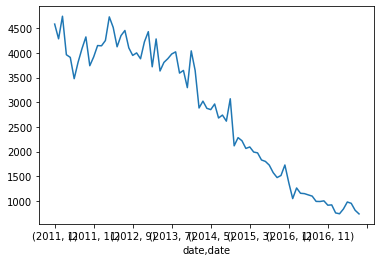

In [240]:
df_RB_US_USER['date'].groupby([df_RB_US_USER['date'].dt.year, df_RB_US_USER['date'].dt.month]).count().plot()